In [74]:
import geopandas as gpd
import geoplot
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio
from rasterio.plot import show
import fiona
from descartes import PolygonPatch

In [ ]:
wd = 'data/IN_expansion_area_UTM'
f = glob(f'{wd}/*.shp')[0]
df = gpd.read_file(f).to_crs(epsg=4326)
wd = 'data/RioMoraNWRBndry_2019'
f = glob(f'{wd}/*.shp')[0]
rio = gpd.read_file(f).to_crs(epsg=4326)


In [75]:
# look at the WDPA-data to compare.
wdpa_file = glob(f'data/WDPAshp_filtered/*.shp')[0]
print(wdpa_file)
wdpa = gpd.read_file(wdpa_file).to_crs(epsg=4326)
wdpa

data/WDPAshp_filtered/WDPA_Nov2019-shapefile-polygons.shp


,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,555609346.0,555609346,1,Rio Mora National Wildlife Refu,Rio Mora National Wildlife Refu,National Wildlife Refuge,National Wildlife Refuge,National,IV,Not Applicable,...,Federal or national ministry or agency,State,U.S. Fish & Wildlife Service,Not Reported,State Verified,1848,US-NM,USA,USA,"POLYGON ((-105.08390 35.86787, -105.08208 35.8..."
1,99848.0,99848,1,Ikh nart,Ikh nart,Nature Reserves,Nature Reserves,National,VI,Not Applicable,...,Government-delegated management,Not Reported,Ministry of Environment and Green Development,Not Reported,State Verified,1803,Not Reported,MNG,MNG,"POLYGON ((108.85092 45.37093, 108.66758 45.338..."


In [77]:
print(wdpa.iloc[0].REP_AREA*247.105)

print(wdpa.iloc[1].REP_AREA*247.105)


4461.1339887078675
108083.72699999998


In [ ]:
ikhnart = df[df.ENG_NAME=='Ikh nart']
in_lat = float(ikhnart.geometry.centroid.y)
in_lon = float(ikhnart.geometry.centroid.x)

In [81]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mongolia = gpd.read_file('data/mongolia/mongolia69.shp')
states = gpd.read_file('data/json/gz_2010_us_040_00_5m.json')
NM = states[states['NAME']=='New Mexico']
dem = rasterio.open('data/geotiff/srtm-dem.tif')

riomora = gpd.read_file(glob('./data/MoraRiverWatershed/*.shp')[0])
#riomora=wdpa[wdpa.NAME=='Rio Mora National Wildlife Refu']
rm_lat = float(riomora.geometry.centroid.y)
rm_lon = float(riomora.geometry.centroid.x)

In [ ]:
fig, axarr = plt.subplots(1,2, figsize=(8,4),\
                        subplot_kw={'projection':\
                                    geoplot.crs.Orthographic(central_latitude=in_lat,\
                                              central_longitude=in_lon)})
geoplot.polyplot(mongolia, facecolor='red', ax=axarr[0])
geoplot.polyplot(ikhnart, facecolor='yellow', ax=axarr[0])
geoplot.polyplot(ikhnart, ax=axarr[1], \
                 facecolor='none', \
                 edgecolor='black')

#show(dem.read(), ax = axarr[1])

axarr[0].set_global()
axarr[0].outline_patch.set_visible(True)
axarr[0].coastlines()
axarr[0].gridlines()

ax0tr = axarr[0].transData # Axis 0 -> Display
ax1tr = axarr[1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((225., -10.)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((225., 1.)))
# 4. Create the patch
arrow = mpl.patches.FancyArrowPatch(
    # Place arrow in figure coord system
    ptB, ptE, transform=fig.transFigure, \
    fc = "blue", connectionstyle="arc3,rad=0.2", \
    arrowstyle='simple', \
    alpha = 0.1,\
    mutation_scale = 40.
)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow)
fig.savefig('figs/iknart_map.png', dpi=200, bbox_inches='tight')


In [82]:
fig, axarr = plt.subplots(1,2, figsize=(8,4),\
                        subplot_kw={'projection':\
                                    geoplot.crs.Orthographic(central_latitude=rm_lat,\
                                              central_longitude=rm_lon)})
geoplot.polyplot(NM, facecolor='red', ax=axarr[0])
geoplot.polyplot(riomora, facecolor='yellow', ax=axarr[0])
geoplot.polyplot(riomora, ax=axarr[1], \
                 facecolor='none', \
                 edgecolor='black')

#show(dem.read(), ax = axarr[1])

axarr[0].set_global()
axarr[0].outline_patch.set_visible(True)
axarr[0].coastlines()
axarr[0].gridlines()

ax0tr = axarr[0].transData # Axis 0 -> Display
ax1tr = axarr[1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((225., -10.)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((225., 1.)))
# 4. Create the patch
arrow = mpl.patches.FancyArrowPatch(
    # Place arrow in figure coord system
    ptB, ptE, transform=fig.transFigure, \
    fc = "blue", connectionstyle="arc3,rad=0.2", \
    arrowstyle='simple', \
    alpha = 0.1,\
    mutation_scale = 40.
)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow)
fig.savefig('figs/mora_map.png', dpi=200, bbox_inches='tight')


/usr/local/lib/python3.6/dist-packages/geoplot/geoplot.py:680: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  


ValueError: Image size of 127529x25636 pixels is too large. It must be less than 2^16 in each direction.

# now show all the WDPA's in USA

In [66]:
# look at the WDPA-data to compare.
wdpa_file = glob(f'data/WDPAshp/*.shp')[0]
wdpa = gpd.read_file(wdpa_file).to_crs(epsg=4326)


#us_file = glob(f'data/json/USA.json')[0]
#usa = gpd.read_file(us_file).to_crs(epsg=4326)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
subset = wdpa[(wdpa.MARINE=='0') & (wdpa.PARENT_ISO=='USA')]
# removing the Marine areas
subset.to_file('data/json/wdpa_usa.json', driver='GeoJSON')

In [16]:
wdpa_cont_us = subset[(subset.SUB_LOC != 'Not Reported') & \
                 (subset.SUB_LOC != 'US-AK') & \
                 (subset.SUB_LOC != 'US-HI')]
x = [row for index,row in wdpa_cont_us.iterrows() if 'US-N/A' not in row.SUB_LOC]
wdpa_cont_us = gpd.GeoDataFrame(x)
wdpa_cont_us.to_file('data/json/wdpa_contiguous_usa.json', driver='GeoJSON')

wdpa_hi = subset[(subset.SUB_LOC != 'Not Reported') & \
                 (subset.SUB_LOC == 'US-HI')]
x = [row for index,row in wdpa_hi.iterrows() if 'US-N/A' not in row.SUB_LOC]
wdpa_hi = gpd.GeoDataFrame(x)
wdpa_hi.to_file('data/json/wdpa_usa_hi.json', driver='GeoJSON')

wdpa_ak = subset[(subset.SUB_LOC != 'Not Reported') & \
                 (subset.SUB_LOC == 'US-AK')]
x = [row for index,row in wdpa_ak.iterrows() if 'US-N/A' not in row.SUB_LOC]
wdpa_ak = gpd.GeoDataFrame(x)
wdpa_ak.to_file('data/json/wdpa_usa_ak.json', driver='GeoJSON')

In [4]:
subset = gpd.read_file('data/json/wdpa_usa.json', driver='GeoJSON')
usa_wdpa = subset[(subset.SUB_LOC != 'Not Reported')]
x = [row for index,row in usa_wdpa.iterrows() if 'US-N/A' not in row.SUB_LOC]
usa_wdpa = gpd.GeoDataFrame(x)
usa_wdpa.to_file('data/json/wdpa_usa_all.json', driver='GeoJSON')

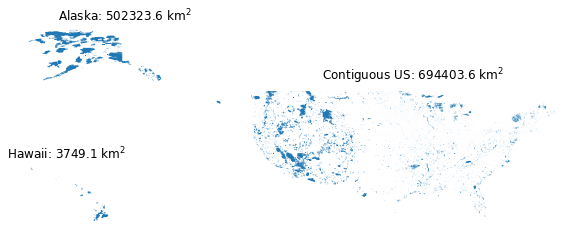

In [65]:
import matplotlib.gridspec as gridspec
f = plt.figure(constrained_layout=False,figsize=(10,6))
gs = gridspec.GridSpec(nrows=4, ncols=5, figure=f)
ax0 = f.add_subplot(gs[0:2,0:2])
ax1 = f.add_subplot(gs[2,0])
ax2 = f.add_subplot(gs[0:,2:])

ax2.set_xlim(-125,-63)
ax2.set_ylim(25,50)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')

ax0.set_title('Alaska: %0.1f km$^2$'%wdpa_ak.REP_AREA.sum())
ax1.set_title('Hawaii: %0.1f km$^2$'%wdpa_hi.REP_AREA.sum())
ax2.set_title('Contiguous US: %0.1f km$^2$'%wdpa_cont_us.REP_AREA.sum())

wdpa_ak.plot(ax=ax0)
wdpa_hi.plot(ax=ax1)
wdpa_cont_us.plot(ax=ax2)

# know the global protected area

In [71]:
print(wdpa.REP_AREA.sum()*247.105)
print((wdpa_ak.REP_AREA.sum()+wdpa_hi.REP_AREA.sum()+wdpa_cont_us.REP_AREA.sum())*247.105)

12195328220.417013
296643692.7397103


In [73]:
2400/296

8.108108108108109

In [79]:
#open mora watershed
mora = gpd.read_file(glob('./data/MoraRiverWatershed/*.shp')[0])

In [80]:
mora

,AREA,PERIMETER,HUC250K_,HUC250K_ID,HUC_CODE,HUC_NAME,REG,SUB,ACC,CAT,Acres,Hectares,geometry
0,3.854307e+09,374182.377431,1530,1520,11080004,Mora,11,1108,110800,11080004,952419.936538,385430.6737,"POLYGON ((-828643.188 1518410.750, -828467.250..."


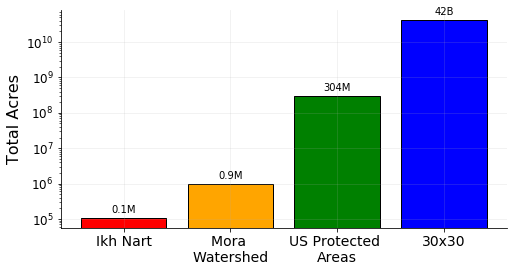

In [148]:
#make a bar chart of total acres to analyze
import numpy as np
ikhnart_area = 108083
mora_area = 954419
us_area = 304500000
earth_area = 126000000000
global_area = earth_area/3

data = np.array([ikhnart_area, mora_area, us_area, global_area])
r = np.arange(len(data))
width = 0.35
labels= ['Ikh Nart', 'Mora \nWatershed', 'US Protected \nAreas', '30x30']
f, ax = plt.subplots(1,1,figsize=(8,4))
bars = ax.bar(r,data,edgecolor='black', color=['red', 'orange', 'green', 'blue'])
ax.set_xticks(r)
ax.set_xticklabels(labels, fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')
ax.grid(alpha=0.2)
ax.set_ylabel('Total Acres', fontsize=16)
ax.tick_params(axis='y',labelsize=12)
numbers = ['0.1M', '0.9M', '304M', '42B']
for i in range(len(bars)):
    height = bars[i].get_height()
    ax.annotate('%s'%numbers[i].format(height),\
               xy = (bars[i].get_x()+ bars[i].get_width()/2, height),\
               xytext=(0,3),\
               textcoords='offset points', ha='center', va='bottom')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
f.savefig('out/scaling.png', dpi=200, transparent=True)

In [129]:
global_area

42000000000.0